<a href="https://colab.research.google.com/github/Atusha/Atusha/blob/Neural_Network/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in Tensorflow
There are many definitions for a regression problem but in our case, we're going to simplify it : predicting a numerical variable based on some other combination of variables, even shorter... predicting a number. 

In [ ]:
#import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit.

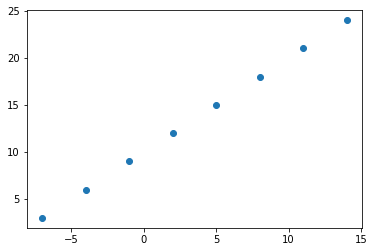

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features. 
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize the feature and label relationship
plt.scatter(X,y)

#Input & Output shapes

In [ ]:
#Create a demo tensor for our housing price prediction problem

input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
#Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
X[0].shape

TensorShape([])

## Steps in modelling with Tensorflow

1. Creating a model - define the input & output layers, as well as hidden layers of a DL model. 

2. Compiling a model - 
* define the loss function (the function which tells our model how wrong it is).
*  the optimizer (tells our model how to improve the patterns its learning)
*  evaluation metrics (what we can use to interpret the performance of our model).

3. Fitting the model - letting the model try to find patterns between X & y (features & labels)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequantial API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1) #1 is taken because we want the model to take 1 feature(number) and predict 1 number.
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #MAE = computes mean absolue error between predicted and labels
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 515ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
#Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#Try and predict with our model
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving the model

We can improve our model by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer. 

2. **Compiling a model** - here we might change the optimization function por perhaps the learniing rate of the optimization function. 

3. **Fitting a model** -  here we might fit a model for more epochs or on more data (give the model more examples to learn from)

In [ ]:
#Larger model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), #activation = None
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(), #Adam(lr=0.0001)
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 336ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.2859 - mae: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6279 - mae: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9702 - mae: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3044 - mae: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6244 - mae: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.9248 - mae: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.1949 - mae: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 8.4303 - mae: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 7.6245 - mae: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 11ms/ste

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

array([[31.941307]], dtype=float32)

###Common ways to improve a deep model:


*   Adding layers
*   Increase the number of hidden units
*   Change the activation functions
*   Change the optimization function
*   Change the learning rate
*   Fitting on more data
*   Fitting for longer

🔑 Because you can alter each of these, they're "HYPERPARAMETERS".

##Evaluating a Model

In practice, a typical workflow you'll g through when building neural networks is: 

> Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model....

When it comes to evaluate a mode, we should visualise the model. 

Its a good idea to visualise: 

* The data - What data are we working on? What does it look like?
* The model itself - what does our model look like? 
* The training of a model - how does a model perform while it learns? 
* The prediction of the model - how do the predictions of a model line up against the ground truth (the original labels)


In [ ]:
#Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

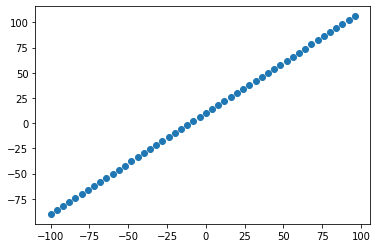

In [ ]:
#Visualise the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets... 
* **Training set** - the model learns from the data, which is typically 70-80% of the total dataset. 
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data. 
* **Test set** - the model gets evaluated on this data to test what it is has learned, this set is typically 10-15% of the total data. 

### Generalization - The ability for a machine learning model to perform well on data it hasn't seen before. 

In [ ]:
#Split the data into train and test set

X_train = X[:40] #80% of the total
X_train = tf.cast(X_train, dtype = tf.float32)
y_train = y[:40]
y_train = tf.cast(y_train, dtype = tf.float32)

X_test=X[40:] #20% of the total
y_test=y[40:]

len(X_train),len(X_test)

(40, 10)

## Visualising the data

Now we've got our data in training and test sets.. let's visualise the data

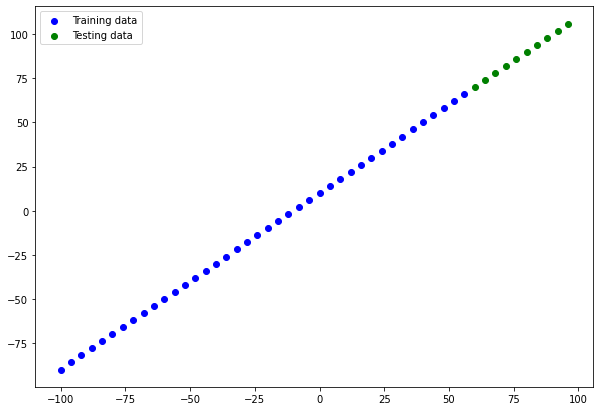

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label ="Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
#Show a legend
plt.legend();

In [ ]:
#Let's create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(X_train, y_train, epochs=100)

## Visualizing the Model

In [ ]:
#Let's create a model which builds automatically by defining the input_shape arguement in the first layer
tf.random.set_seed(42)

model=tf.keras.Sequential(([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
]),name="model_1")

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model. 
* Trainable parameters - these are the parameters (patterns) the model can update as it trains. 
* Non-trinable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖 **Resource** - checkout introduction videos of MIT deep learning

In [ ]:
#Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose = 0)

In [ ]:
#Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


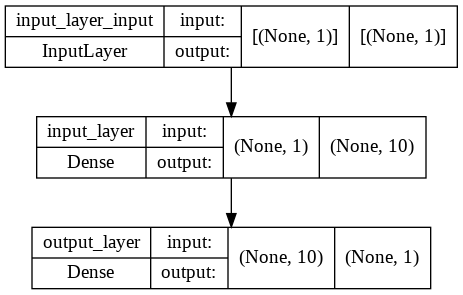

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

##Visualising our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels. 

Often you'l see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [ ]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 If you feel like you're going to reuse some kind of functonality in the future, it's a good idea to create a function. 

In [ ]:
#Create a plotting function
def prediction_plot(train_data = X_train,
                    train_label= y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = y_pred):
  plt.figure(figsize=(10,7))
  #training data in blue
  plt.scatter(train_data, train_label, c="b", label="Training data")
  #testing in yellow
  plt.scatter(test_data, test_label, c="y", label="Testing data")
  #prediction in red
  plt.scatter(test_data, predictions, c="r", label="Prediction data")
  plt.legend()

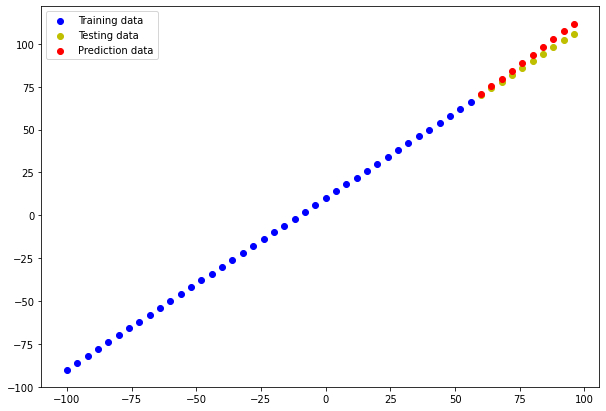

In [ ]:
prediction_plot()

##Evaluating our model's predictions with regressiong evaluation metrics.

Depending on the problem you are working on, there will be different evaluation metrics 

Mainly there are two metrics for regression:
* MAE - Mean absolute Error, "on average, how wrong is each of my model's prediction value"
*MSE - Mean square Error, square the errors"

In [ ]:
#Evaluate the mode on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 143ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
#Calculate MAE
tf.keras.losses.MAE(y_test,tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
#Calculate the perfect MAE
tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
#Calculate the MSE
tf.keras.losses.MSE(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
#Make functions to reuse MAE & MSE

def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true,y_pred)

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true,y_pred)

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model....
```

1. Get more data - get more examples for your model to train on.
2. Make your model larger (using a more complex model) - this might come in the form of more layers orm ore hidden units in each layers.
3. Train for longer - give your model more of a chance to find a pattern in the training data. 

Let's do 3 modelling experiments: 

1. `model_1`- similar to original one, with 100 epochs. 
2. `model_2` - 2 layers, with 100 epochs. 
3.`model_3` - 2 layers, 500 epochs


Build **model_1**

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create a model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile
model_1.compile(loss = "mae",
           optimizer=tf.keras.optimizers.SGD(),
           metrics=["mae"])

#Fit
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

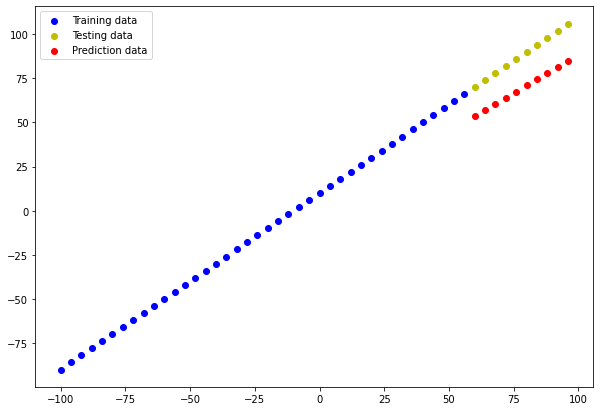

In [ ]:
#Make and plot the model_1

y_preds_1 = model_1.predict(X_test)
prediction_plot(predictions=y_preds_1)

Build **model_2**

In [ ]:
#Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#Fit
model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 73.0019 - mse: 7955.5830
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 17.5325 - mse: 483.7135
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 20.4862 - mse: 612.8412
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 13.1871 - mse: 230.7354
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.5492 - mse: 261.8344
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.6087 - mse: 155.5869
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 12.6668 - mse: 215.1633
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0468 - mse: 150.9927
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 39.7317 - mse: 2475.0767
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.2189 - mse: 1042.4827
Epoch 11/100
2/2 [============================

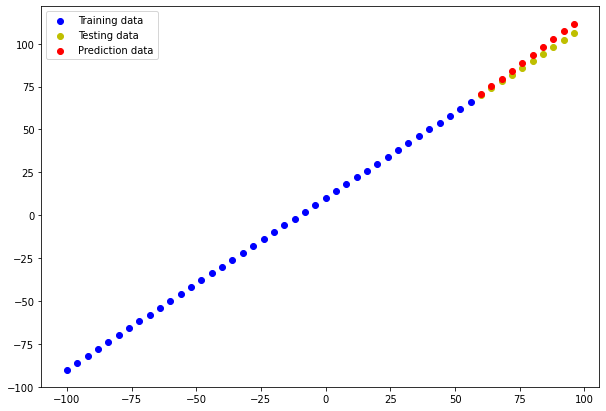

In [ ]:
#Visualise
y_pred_2 = model_2.predict(X_test)
prediction_plot(predictions=y_pred_2)

Build **model_3**

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")

model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 21.9353 - mae: 21.9353
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 22.0862 - mae: 22.0862
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 28.3525 - mae: 28.3525
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 23.1307 - mae: 23.1307
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 13.8184 - mae: 13.8184
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 11.0722 - mae: 11.0722
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 12.0519 - mae: 12.0519
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 10.8345 - mae: 10.8345
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 37.3929 - mae: 37.3929
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 25.0762 - mae: 25.0762
Epoch 11/500
2/2 [==============================] - 0s 3ms

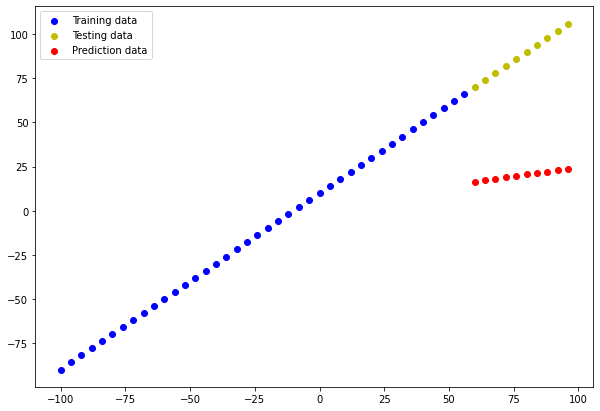

In [ ]:
y_pred_3 = model_3.predict(X_test)
prediction_plot(predictions=y_pred_3)

In [ ]:
#Calculate all models evaluation metrics.
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mse_2 = mse(y_test,tf.squeeze(y_pred_2))
mae_3 = mae(y_test, tf.squeeze(y_pred_3))
mse_3 = mse(y_test, tf.squeeze(y_pred_3))

## Comparing the results of our experiments

Let's compare the results. 

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(),mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.110995,12.497052
2,model_3,67.909554,4696.061523


Looks like model_2 performed the best..

🔑 One of your main goal would be to minimise the time between your experiments The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuiring out what does work. 

##Tracking your experiments

One really good habit in ML modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments. 

Luckily, we have tools: 

📖 **Resources**:

* TensorBoard - a component of the Tensorflow library to help track modelling experiments
* Weights & Biases - a tool for tracking all of kinds ML experiments. 

#Saving our Models

Saving our mdoels allows us to use it outside of colab or wherever we want. (such as in web application or a mobile app)


Two formats for saving model: 

* The SavedModel format
* The HDF5 format


In [ ]:
#Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
#Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

##Loading in a saved model



In [ ]:
#Load in the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")

In [ ]:
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#Load in a model HDF5 format
loaded_h5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

In [ ]:
#Compare model_2 predictions with H5 format model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_format_preds = loaded_h5_format.predict(X_test)
model_2_preds == loaded_h5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

#A larger example

In [ ]:
#import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### To convert the categorical into numerical values, we mainly use one-hot encoding because the categorical field like "Gender", "Smoker" are of type = object whereas the numerical field like "Age" is of type  int32/64. 

In [ ]:
#Let's try one-hot encoding our Dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Create X & y (features & labels)
X = insurance_one_hot.drop("charges", axis=1) #feature
y= insurance_one_hot["charges"] #label

In [ ]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(X_test)

(1070, 268)

In [ ]:
#Build a neural network

charges_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

charges_model.compile(loss = "mae",
                      optimizer = tf.keras.optimizers.SGD(),
                      metrics=["mae"])

charges_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8716.4688 - mae: 8716.4688
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7883.9185 - mae: 7883.9185
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7605.7485 - mae: 7605.7485
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 7606.8960 - mae: 7606.8960
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7703.9551 - mae: 7703.9551
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7643.4912 - mae: 7643.4912
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7546.4575 - mae: 7546.4575
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7736.8052 - mae: 7736.8052
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7548.9189 - mae: 7548.9189
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7731.2910 - mae: 7731.2910

In [ ]:
#Check the results of the model
charges_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8962.6367 - mae: 8962.6367


[8962.63671875, 8962.63671875]

##Build Experiment model 1

In [ ]:
#Experiment 1 with charges_model
charges_model_exp1 = tf.keras.Sequential([
                    tf.keras.layers.Dense(100),
                    tf.keras.layers.Dense(10),
                    tf.keras.layers.Dense(1)
])

charges_model_exp1.compile(loss = "mae",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics=["mae"])

charges_model_exp1.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13268.4639 - mae: 13268.4639
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13061.3486 - mae: 13061.3486
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12654.8975 - mae: 12654.8975
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11904.9453 - mae: 11904.9453
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10715.0078 - mae: 10715.0078
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9271.5957 - mae: 9271.5957
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8020.7441 - mae: 8020.7441
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7988 - mae: 7496.7988
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7420.8643 - mae: 7420.8643
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7401.3711 - mae:

In [ ]:
charges_model_exp1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4813.8833 - mae: 4813.8833


[4813.88330078125, 4813.88330078125]

## Build experiment 2 model

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create a neural network model
charges_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
charges_model2.compile(loss="mae",
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics=["mae"])

#Fit the model
history = charges_model2.fit(X_train, y_train, epochs=500,verbose=0)

In [ ]:
#Evaluating the more epochs model
charges_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.5703 - mae: 3170.5703


[3170.5703125, 3170.5703125]

Text(0.5, 0, 'epochs')

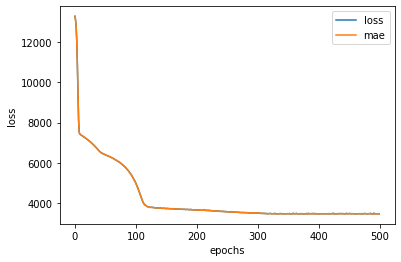

In [ ]:
#Plot history (also known as a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

>⭐How long should you train your model for? 
The solution is called `EarlyStopping Callback`, which is a Tensorflow component you can add to your model to stop training once the model stops improving at a certain metric. 

# Preprocessing data (Normalization and Standardization)

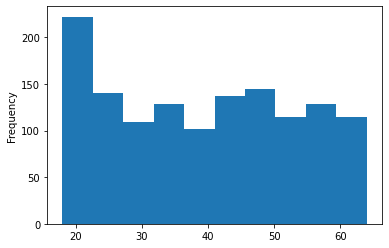

In [ ]:
X["age"].plot(kind="hist")

**Scaling / Normalization** - convets all the numerical value between 0 and 1 while preserving the original distribution.

**Standardization** - Removes the mean and divide each value by the standard deviation. (When to use this - to transform a feature to have close to normal distribution, `this reduces the effect of outliers`.)

📖 : [Resource for Scaling & Standardization](https://github.com/mrdbourke/tensorflow-deep-learning)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

To prepare our data, we can borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns between 0 and 1 
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region" ])
)

#Create X & y values. 
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

#Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
#What does our data looks like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Now let's build a neural network model on it.

In [ ]:
#Build a neural network model to fit on our normalized data

#Create a neural network
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

#Fit the model 
insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13344.2314 - mae: 13344.2314
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13336.8213 - mae: 13336.8213
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13316.9512 - mae: 13316.9512
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 13273.8916 - mae: 13273.8916
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13196.7715 - mae: 13196.7715
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13074.7617 - mae: 13074.7617
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12897.6738 - mae: 12897.6738
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12655.4170 - mae: 12655.4170
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12337.7451 - mae: 12337.7451
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11939.58

In [ ]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3441.3308 - mae: 3441.3308


[3441.330810546875, 3441.330810546875]